In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('/content/sample_data/movieReplicationSet.csv')
data_df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


## 5)  Do people who are only children enjoy 'The Lion King (1994)' more than people with siblings?

In [ ]:
L0 = pd.to_numeric(data_df['The Lion King (1994)'].loc[data_df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']==0],errors='coerce').values # Not an only child
L1 = pd.to_numeric(data_df['The Lion King (1994)'].loc[data_df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']==1],errors='coerce').values # Only child

# element-wise remove NaN
L0 = L0[np.isfinite(L0)]
L1 = L1[np.isfinite(L1)]

(array([ 1.,  3.,  1.,  2.,  0.,  6., 12., 32., 28., 66.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

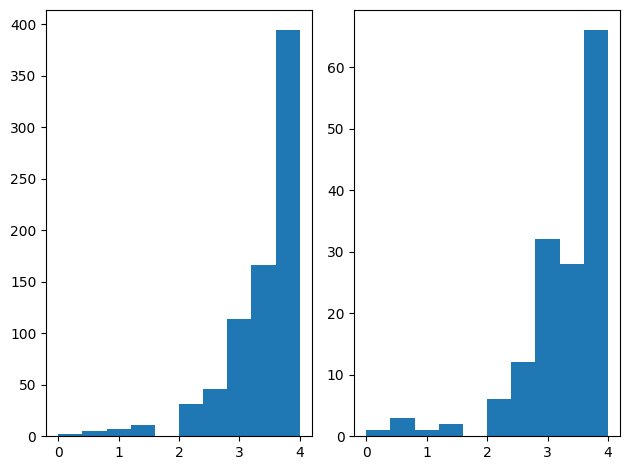

In [ ]:
# plot hist of two groups
n_bins = 10
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

axs[0].hist(L0, bins=n_bins)
axs[1].hist(L1, bins=n_bins)

In [ ]:
# Since they have similar distribution, we can use Mann Whiteney U test
u1,p1 = stats.mannwhitneyu(L0, L1)
u1,p1

(64247.0, 0.04319872995682849)

## 6)  What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [ ]:
p_val = []

start = 1
end = 400

effect = 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'

for col_idx in range(start, end+1):
    movie = data_df.columns[col_idx]
    group1 = data_df[data_df[effect] == 1].iloc[:, col_idx]
    group0 = data_df[data_df[effect] == 0].iloc[:, col_idx]

    group1 = group1[np.isfinite(group1)]
    group0 = group0[np.isfinite(group0)]

    _, p = stats.mannwhitneyu(group0, group1)
    p_val.append((movie, p))

alpha = 0.005
s_movies = sum(p < alpha for _, p in p_val)
proportion = s_movies / len(p_val)

print(f"Proportion of movies which exhibit an only child effect: {proportion * 100:.2f}%")

Proportion of movies which exhibit an only child effect: 1.75%


## 7) Do people who like to watch movies socially enjoy 'The Wolf of Wall Street (2013)' more than those who prefer to watch them alone?

In [ ]:
W0 = pd.to_numeric(data_df['The Wolf of Wall Street (2013)'].loc[data_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==0],errors='coerce').values # like to watch movies socially
W1 = pd.to_numeric(data_df['The Wolf of Wall Street (2013)'].loc[data_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==1],errors='coerce').values # prefer to watch alone

# element-wise remove NaN
W0 = W0[np.isfinite(W0)]
W1 = W1[np.isfinite(W1)]

(array([  4.,   5.,   9.,  13.,   0.,  22.,  46.,  81.,  99., 114.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

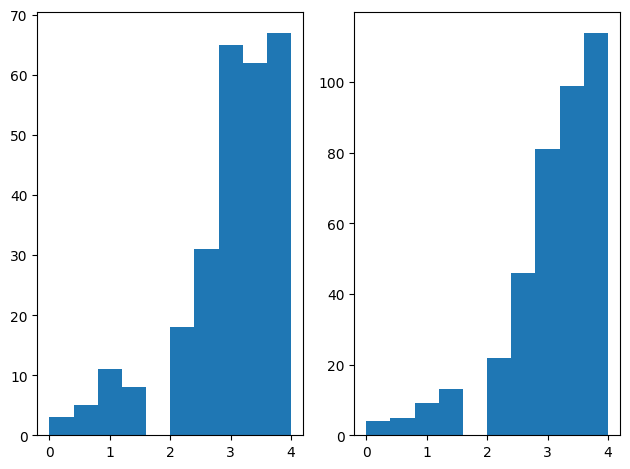

In [ ]:
# plot hist of two groups
n_bins = 10
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

axs[0].hist(W0, bins=n_bins)
axs[1].hist(W1, bins=n_bins)

In [ ]:
u2,p2 = stats.mannwhitneyu(W0, W1)
u2,p2

(49303.5, 0.1127642933222891)

## 8) What proportion of movies exhibit such a “social watching” effect?

In [ ]:
p_val2 = []

start = 1
end = 400

effect = 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'

for col_idx in range(start, end+1):
  movie = data_df.columns[col_idx]
  group1 = data_df[data_df[effect] == 1].iloc[:, col_idx]
  group0 = data_df[data_df[effect] == 0].iloc[:, col_idx]

  group1 = group1[np.isfinite(group1)]
  group0 = group0[np.isfinite(group0)]

  _, p = stats.mannwhitneyu(group0, group1)
  p_val2.append((movie, p))

alpha = 0.005
s_movies2 = sum(p < alpha for _, p in p_val2)
proportion2 = s_movies2 / len(p_val2)

print(f"Proportion of movies which exhibit a social watching effect: {proportion2 * 100:.2f}%")

Proportion of movies which exhibit a social watching effect: 2.50%
